# 面向公司的机器学习入门讲义

## [0x01] 环境准备
- python 3.6+
- jupyterlab 2.1.2
- matplotlib 3.2.1
- tensorflow 2.2.0
- sklearn 0.23.1

In [1]:
%matplotlib inline

## [0x02] 环境启动方法
```sh
jupyter notebook --no-browser --port=8086 --ip=<YOUR IP>
```

## [1x01] 当我们说AI时，我们是在谈论什么？

一张鸟瞰图，找准我们的位置
![00001](asset/00001.png)

- <b>人工智能</b>  非常宽泛的领域，通常不能准确的表述所要讨论的问题
- <b>机器学习</b>  泛指传统机器学习，特点：
    - 不包含神经网络
    - 提出时间相对较早
    - 代表性算法：支持向量机(SVM) / 决策树等
- <b>深度学习</b>  针包含神经网络构成的机器学习算法的总称。特点：
    - <span style='color:red;'>由神经网络构成</span>
    - 随着算力的不断加强，可训练的层数比较深

## [1x02] 什么是机器学习算法

### 什么是 ~传统~ 算法?

算法是利用计算机解决问题的处理步骤，简而言之，<b>算法就是解决问题的步骤</b>。

算法不仅仅用于计算机的数据处理，现实世界中的各种问题也需要结合算法的概念来解决，其中，具有代表性的就是烹饪中用到的食谱，食谱是各种美味料理的制作方法，需要用一定的步骤表示出来。

![00003](asset/00003.jpg)

多说无益，上干货。

想想以下我们要烹饪一道美食：
- 材料
- 菜谱
- 工具

已经全部就为

![00002](asset/00002.jpg)

分析之下，我们会精心设计一个可控的流程，环环相扣，从输入开始一步一步得到结果。

![00004](asset/00004.jpg)

这是我们正常处理事情的方法，也是学校里老师所教授的。

敲黑板复习一下：
- 排序算法
- 树
  - 二叉
  - 红黑 ~面试树~
  - 深度优先
  - 广度优先
- 图
- 动态规划

![00005](asset/00005.jpg)

机器学习算法完全不是这个套路。

### 机器学习算法

机器学习算法与传统算法最大的不同点在于：**机器学习算法是根据数据反推规则**

想一想人类是如何学习新事物的？
- 读书
- 思考
- 技能

机器学习仿照人的学习方式来工作：
- 输入数据
- 挖掘关系、总结规律
- 输出模型

![00006](asset/00006.jpg)

装X版
![00007](asset/00007.jpg)

### 机器学习 VS 深度学习

机器学习与深度学习最大的区别在于，深度学习依靠**神经网络**作为模型的载体。

神经网络长什么样子？
![00009](asset/00009.jpg)

![00010](asset/00010.jpg)

很酷是吧？

下面看一下几个颠覆性的结论：
- 无法预判最终会得到什么样的模型
- 同样的数据，同样的算法，还是会得到不同的模型
  - 这些模型有的可用，有的却完全无效
- 超参数都是百万级别起步的，无法手工调整
- 现阶段对于模型的整个训练过程，无法解释

### Demo

先来看一个机器学习的典型事例。

**鸢尾花的分类**
由Fisher在1936年整理，包含4个特征:
- Sepal.Length（花萼长度）
- Sepal.Width（花萼宽度）
- Petal.Length（花瓣长度）
- Petal.Width（花瓣宽度）

特征值都为正浮点数，单位为厘米。

目标值为鸢尾花的分类
- Iris Setosa(山鸢尾)
- Iris Versicolor(杂色鸢尾)
- Iris Virginica(维吉尼亚鸢尾)

![00008_1](asset/00008_1.jpg)
![00008_2](asset/00008_2.jpg)
![00008_3](asset/00008_3.jpg)

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
print("The iris' target names: ", iris.target_names)

X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

iris.data.shape

The iris' target names:  ['setosa' 'versicolor' 'virginica']


(150, 4)

In [3]:
# 数据长什么样(前10条)
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

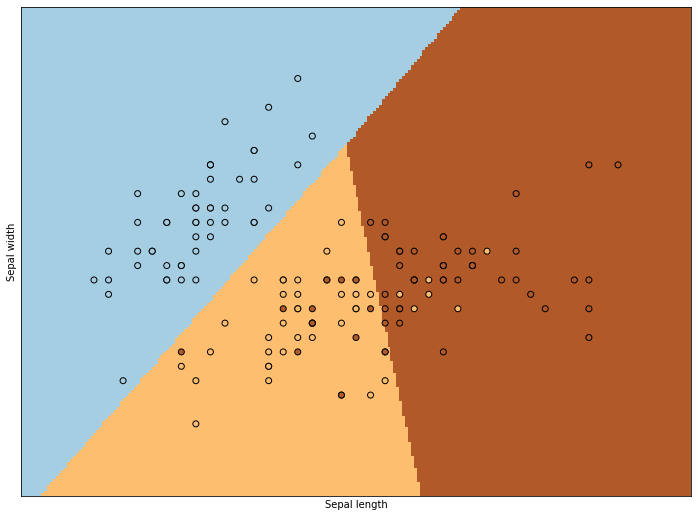

In [4]:
# 完整代码
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

logreg = LogisticRegression(C=1e5)

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(12, 9))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

### Demo

再来看一个使用**神经网络**的例子

**线性回归** 用一条线，来描述一种趋势
很多时候，如果把业务数据画在一张图标上，我们往往可以看出其发展的规律；

如果把这些数据“放到”一个预先定义好结构的神经网络里，那么我们就得到一个包含了这种规律的“模型”

(500, 4)
[ 1.         -1.00401606  1.00804826 -1.01209664]
Epoch 1/500
16/16 [==============================] - 0s 2ms/step - loss: 0.5681
Epoch 2/500
16/16 [==============================] - 0s 3ms/step - loss: 0.5278
Epoch 3/500
16/16 [==============================] - 0s 3ms/step - loss: 0.4906
Epoch 4/500
16/16 [==============================] - 0s 5ms/step - loss: 0.4563
Epoch 5/500
16/16 [==============================] - 0s 4ms/step - loss: 0.4283
Epoch 6/500
16/16 [==============================] - 0s 4ms/step - loss: 0.3996
Epoch 7/500
16/16 [==============================] - 0s 4ms/step - loss: 0.3755
Epoch 8/500
16/16 [==============================] - 0s 3ms/step - loss: 0.3549
Epoch 9/500
16/16 [==============================] - 0s 3ms/step - loss: 0.3345
Epoch 10/500
16/16 [==============================] - 0s 4ms/step - loss: 0.3167
Epoch 11/500
16/16 [==============================] - 0s 3ms/step - loss: 0.3001
Epoch 12/500
16/16 [==============================] - 0s 3m

16/16 [==============================] - 0s 3ms/step - loss: 0.0374
Epoch 102/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0371
Epoch 103/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0369
Epoch 104/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0366
Epoch 105/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0364
Epoch 106/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0361
Epoch 107/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0358
Epoch 108/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0356
Epoch 109/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0353
Epoch 110/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0351
Epoch 111/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0348
Epoch 112/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0346
Epoch 113/500
16/16 [=========

16/16 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 202/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0164
Epoch 203/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0162
Epoch 204/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0161
Epoch 205/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0159
Epoch 206/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0157
Epoch 207/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0156
Epoch 208/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0154
Epoch 209/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0153
Epoch 210/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0151
Epoch 211/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0150
Epoch 212/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0148
Epoch 213/500
16/16 [=========

16/16 [==============================] - 0s 3ms/step - loss: 0.0057
Epoch 302/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0057
Epoch 303/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 304/500
16/16 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 305/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0055
Epoch 306/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0055
Epoch 307/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0054
Epoch 308/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0054
Epoch 309/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0053
Epoch 310/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0053
Epoch 311/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0052
Epoch 312/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0052
Epoch 313/500
16/16 [=========

16/16 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 401/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 402/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 403/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 404/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 405/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 406/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 407/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0038
Epoch 408/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0038
Epoch 409/500
16/16 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 410/500
16/16 [==============================] - 0s 5ms/step - loss: 0.0038
Epoch 411/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 412/500
16/16 [=========

16/16 [==============================] - 0s 5ms/step - loss: 0.0038
Epoch 500/500
16/16 [==============================] - 0s 3ms/step - loss: 0.0038


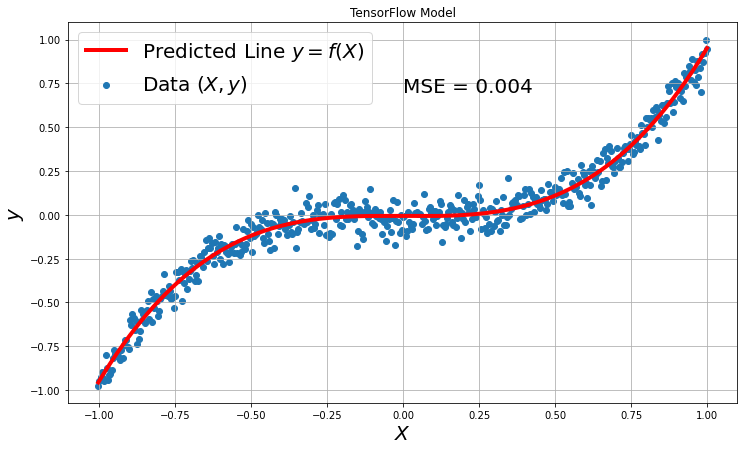

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import PolynomialFeatures

# parameter
degree_n = 3


def dataset(show=True):
    X = np.arange(-25, 25, 0.1)
    # Try changing y to a different function
    y = X**3 + 20 + np.random.randn(500)*1000
    if show:
        plt.scatter(X, y)
        plt.show()
    return X, y


def create_model():
    model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[degree_n+1])])
    # you can also define optimizers in this way, so you can change parameters like lr.
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    return model


def create_polynomial_features(x, n):
    poly = PolynomialFeatures(degree=n)
    _x_n = poly.fit_transform(x.reshape(-1, 1))
    print(_x_n.shape)
    print(_x_n[0])
    return _x_n


X, y = dataset(show=False)
X_scaled = X/max(X)
y_scaled = y/max(y)

X_2 = create_polynomial_features(X_scaled, degree_n)


model = create_model()

tf_history = model.fit(X_2, y_scaled, epochs=500, verbose=True)


# plt.plot(tf_history.history['loss'])
# plt.xlabel('Epochs')
# plt.ylabel('MSE Loss')
# plt.show()

mse = tf_history.history['loss'][-1]
y_hat = model.predict(X_2)

plt.figure(figsize=(12,7))
plt.title('TensorFlow Model')
plt.scatter(X_2[:, 1], y_scaled, label='Data $(X, y)$')
plt.plot(X_2[:, 1], y_hat, color='red', label='Predicted Line $y = f(X)$',linewidth=4.0)
plt.xlabel('$X$', fontsize=20)
plt.ylabel('$y$', fontsize=20)
plt.text(0,0.70,'MSE = {:.3f}'.format(mse), fontsize=20)
plt.grid(True)
plt.legend(fontsize=20)
plt.show()

这一根红色的曲线，就是神经网络，通过输入的数据所“找到”的“规律”。

### DEMO

使用神经网络可以解决图像领域的很多问题。下面介绍经典的手写数字识别。

手写识别数据库 MNIST

TODO: 数据库介绍

In [6]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

batch_size = 128
num_classes = 10
epochs = 20

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

Using TensorFlow backend.


60000 train samples
10000 test samples


OK，OK，数据长什么样子？

In [7]:
# The first training data
x_train[1:]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

鹅，好像不太好理解。。。。。

![00015](asset/00015.jpg)

别急，转换成人类看的懂的形势

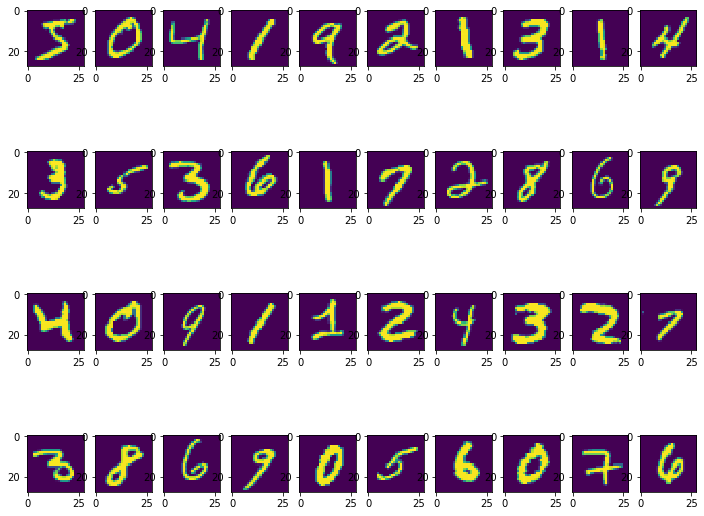

In [8]:
# preview the images first
plt.figure(figsize=(12,10))
x, y = 10, 4
for i in range(40):
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i].reshape((28,28)),interpolation='nearest')
plt.show()

下面来构建网络

In [9]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


超参数 大概是 67万个

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.2424 - accuracy: 0.9255 - val_loss: 0.0947 - val_accuracy: 0.9701
Epoch 2/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.1020 - accuracy: 0.9689 - val_loss: 0.0749 - val_accuracy: 0.9759
Epoch 3/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.0751 - accuracy: 0.9776 - val_loss: 0.0769 - val_accuracy: 0.9784
Epoch 4/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.0590 - accuracy: 0.9815 - val_loss: 0.0709 - val_accuracy: 0.9826
Epoch 5/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.0495 - accuracy: 0.9846 - val_loss: 0.0773 - val_accuracy: 0.9797
Epoch 6/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.0426 - accuracy: 0.9872 - val_loss: 0.0838 - val_accuracy: 0.9799
Epoch 7/20
60000/60000 [==============================] - 5s 87us

正确率大概98%，不够直观？

那就来看图说话：

In [6]:
def show_result(in_history):

#     print(in_history.history.keys())

    loss = in_history.history['loss']
    val_loss = in_history.history['val_loss']
    acc = in_history.history['accuracy']
    val_acc = in_history.history['val_accuracy']
    epochs = range(1, len(loss) + 1)

    plt.figure(num='Data logistic', figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy')
    plt.legend()

    plt.show()

show_result(history)

NameError: name 'history' is not defined

### DEMO

最后来看一个例子。

如果我有了模型，那我应该如何使用？

**大象的故事**

世界上存在着两个最大的种群
- 非洲象
- 亚洲象

[非洲象和亚洲象的区别岂止是耳朵](https://www.sohu.com/a/131947296_121289)

现在我们就来利用一个已经训练好的模型来给大想做一个分类

先来看一看本次的主角长什么样子？

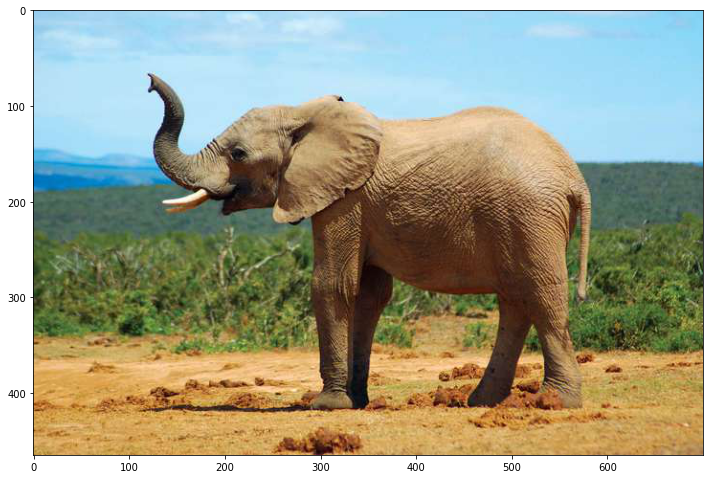

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure(figsize=(12,10))
img=mpimg.imread('asset/African-savanna-elephant.jpg')
imgplot = plt.imshow(img)
plt.show()

然后，我们进行推断

In [27]:
from keras.applications.vgg16 import (
    VGG16, preprocess_input, decode_predictions)
from keras.preprocessing import image
from keras.layers.core import Lambda
from keras.models import Sequential
from tensorflow.python.framework import ops
import keras.backend as K
import tensorflow as tf
import numpy as np
import keras
import sys
import cv2

def target_category_loss(x, category_index, nb_classes):
    return tf.multiply(x, K.one_hot([category_index], nb_classes))

def target_category_loss_output_shape(input_shape):
    return input_shape

def normalize(x):
    # utility function to normalize a tensor by its L2 norm
    
    print(x)
    
    return x / (K.sqrt(K.mean(K.square(x))) + 1e-5)

def load_image(img_path):
    # img_path = sys.argv[1]
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

def register_gradient():
    if "GuidedBackProp" not in ops._gradient_registry._registry:
        @ops.RegisterGradient("GuidedBackProp")
        def _GuidedBackProp(op, grad):
            dtype = op.inputs[0].dtype
            return grad * tf.cast(grad > 0., dtype) * \
                tf.cast(op.inputs[0] > 0., dtype)

def compile_saliency_function(model, activation_layer='block5_conv3'):
    input_img = model.input
    layer_dict = dict([(layer.name, layer) for layer in model.layers[1:]])
    layer_output = layer_dict[activation_layer].output
    max_output = K.max(layer_output, axis=3)
    saliency = K.gradients(K.sum(max_output), input_img)[0]
    return K.function([input_img, K.learning_phase()], [saliency])

def modify_backprop(model, name):
    g = tf.compat.v1.get_default_graph()
    with g.gradient_override_map({'Relu': name}):

        # get layers that have an activation
        layer_dict = [layer for layer in model.layers[1:]
                      if hasattr(layer, 'activation')]

        # replace relu activation
        for layer in layer_dict:
            if layer.activation == keras.activations.relu:
                layer.activation = tf.nn.relu

        # re-instanciate a new model
        new_model = VGG16(weights='imagenet')
    return new_model

def deprocess_image(x):
    '''
    Same normalization as in:
    https://github.com/fchollet/keras/blob/master/examples/conv_filter_visualization.py
    '''
    if np.ndim(x) > 3:
        x = np.squeeze(x)
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    if K.image_dim_ordering() == 'th':
        x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def grad_cam(input_model, image, category_index, layer_name):
    model = Sequential()
    model.add(input_model)

    nb_classes = 1000
    target_layer = lambda x: target_category_loss(x, category_index, nb_classes)
    model.add(Lambda(target_layer,
                     output_shape = target_category_loss_output_shape))

    loss = K.sum(model.layers[-1].output)
    conv_output =  [l for l in model.layers[0].layers if l.name is layer_name][0].output
    grads = normalize(K.gradients(loss, conv_output)[0])
    gradient_function = K.function([model.layers[0].input], [conv_output, grads])

    output, grads_val = gradient_function([image])
    output, grads_val = output[0, :], grads_val[0, :, :, :]

    weights = np.mean(grads_val, axis = (0, 1))
    cam = np.ones(output.shape[0 : 2], dtype = np.float32)

    for i, w in enumerate(weights):
        cam += w * output[:, :, i]

    cam = cv2.resize(cam, (224, 224))
    cam = np.maximum(cam, 0)
    heatmap = cam / np.max(cam)

    #Return to BGR [0..255] from the preprocessed image
    image = image[0, :]
    image -= np.min(image)
    image = np.minimum(image, 255)

    cam = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
    cam = np.float32(cam) + np.float32(image)
    cam = 255 * cam / np.max(cam)
    return np.uint8(cam), heatmap

preprocessed_input = load_image('asset/African-savanna-elephant.jpg')

model = VGG16(weights='imagenet')

predictions = model.predict(preprocessed_input)
top_1 = decode_predictions(predictions)[0][0]
print('Predicted class:')
print('%s (%s) with probability %.2f' % (top_1[1], top_1[0], top_1[2]))

Predicted class:
African_elephant (n02504458) with probability 0.84


从结果上我们可以看到，模型推断说这是一只非洲象，根据我们 **人工的智能** 推断正确。

TODO 那么，问题来了：模型是如何判断的呢？

**总结**一下，对于一个神经网络：
- 投喂的是“数据”
- 建立的是“网络”
- 产出的是“模型”（规律）

![00011](asset/00011.jpg)

## [Nx01] 如何从入门到放弃

最后来看一看如何从入门到 ~专家~ 放弃

也许你眼中的机器学习工程师是这样的
![00012](asset/00012.jpg)

情况大体不差，通过上面的代码来看，使用其实不是太难，概念也可以理解。
然鹅，如何选择合适的切入点是个技术活儿。

目前市面上有很多关于AI的书籍，内容和质量参差不全。

下面两本书虽是经典，但不是切入的好方法

![00016](asset/00016.jpg)

尽量找一些可视化的教材入手会比较容易理解



https://www.bilibili.com/video/BV1F7411D7R7/

总结
- 入门和应用不可怕
- 深度研究要有强悍的数学作为基本功

![00014](asset/00014.jpg)

最后是广告时间：欢迎大家加入用友AI技术人员的家

![00017](asset/00017.png)